In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from collections import deque

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15 , 10)
sns.set_style('darkgrid')

### Part 1: Averaging of only noise

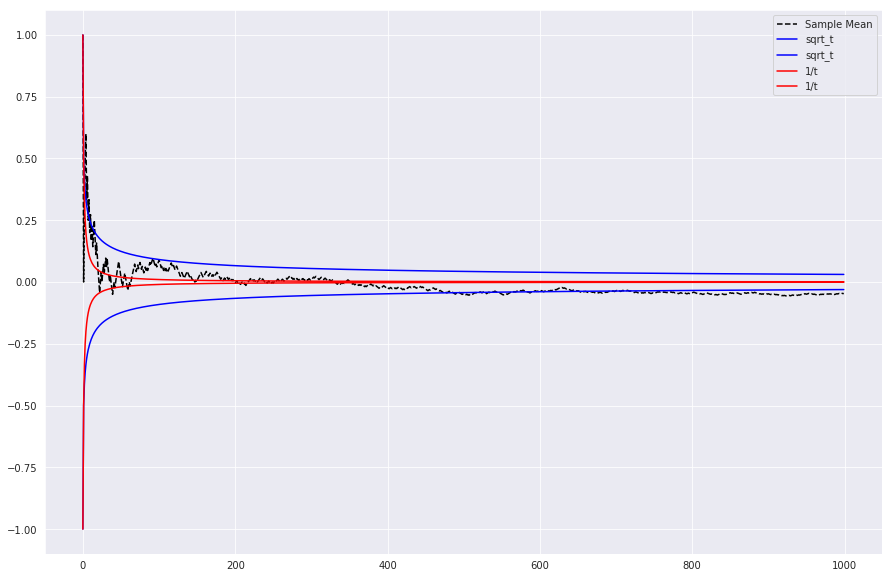

In [3]:
# fix the size of the sample
size = 1000
# generate noise from an array of available choices
noise = np.random.choice([-1,1] , size=size)
# declaring a sample mean array
sample_mean = np.zeros_like(noise , dtype=np.float)

# loop to calculate the sample mean for every time step
for t in range(size):
    sample_mean[t] = np.mean(noise[:t+1])
    
plt.plot(range(sample_mean.shape[0]) , sample_mean , "k--", label="Sample Mean")

# plotting the 1/sqrt(t) on the same figure
sqrt_t = 1/(np.sqrt(np.arange(sample_mean.shape[0])) + 1)
plt.plot(range(sample_mean.shape[0]) , sqrt_t , "b-" , range(sample_mean.shape[0]) , -sqrt_t , "b-" , label="sqrt_t")

# plottin the 1/t on the same figure
inv_t = 1/(np.arange(sample_mean.shape[0]) + 1)
plt.plot(range(sample_mean.shape[0]) , inv_t , "r-" , range(sample_mean.shape[0]) , -inv_t , "r-" , label="1/t")

plt.legend()

### Part 2: Averaging of only noise using recursion

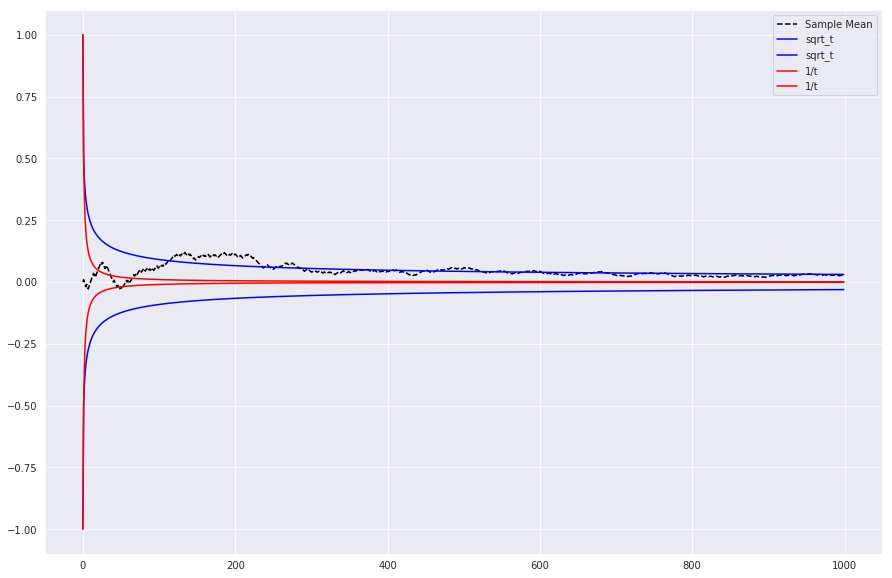

In [13]:
# fix the size of the sample
size = 1000
k = 100
# generate noise from an array of available choices
noise = np.random.choice([-1,1] , size=size)
# declaring a sample mean array
sample_mean = np.zeros_like(noise , dtype=np.float)

# loop to calculate the sample mean for every time step
sample_mean[0] = 0
for t in range(1 , size):
    alpha = 1/(t+k)
    sample_mean[t] = sample_mean[t-1] + alpha* (noise[t] - sample_mean[t-1])
    
plt.plot(range(sample_mean.shape[0]) , sample_mean , "k--" , label="Sample Mean")


# plotting the 1/sqrt(t) on the same figure
sqrt_t = 1/(np.sqrt(np.arange(sample_mean.shape[0])) + 1)
plt.plot(range(sample_mean.shape[0]) , sqrt_t , "b-" , range(sample_mean.shape[0]) , -sqrt_t , "b-" , label="sqrt_t")

# plottin the 1/t on the same figure
inv_t = 1/(np.arange(sample_mean.shape[0]) + 1)
plt.plot(range(sample_mean.shape[0]) , inv_t , "r-" , range(sample_mean.shape[0]) , -inv_t , "r-" , label="1/t")

plt.legend()
# # plottin the 1/t on the same figure
# inv_t_plus_k = 1/(np.arange(sample_mean.shape[0]) + k)
# plt.plot(range(sample_mean.shape[0]) , inv_t_plus_k , "g-" , range(sample_mean.shape[0]) , -inv_t_plus_k , "g-")

### Part 3: Averaging of only noise using recursion with fixed alpha

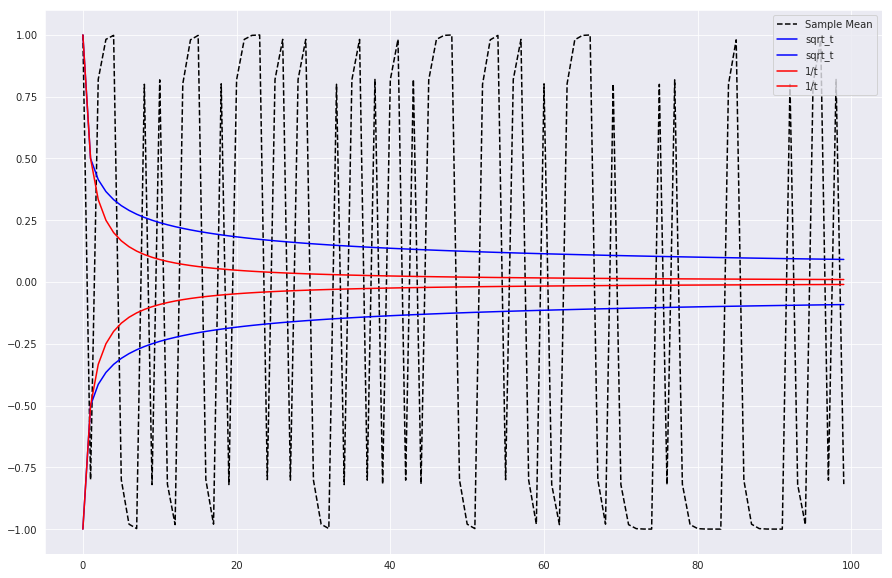

In [5]:
# fix the size of the sample
size = 100
alpha = 0.9
# generate noise from an array of available choices
noise = np.random.choice([-1,1] , size=size)
# declaring a sample mean array
sample_mean = np.zeros_like(noise , dtype=np.float)

# loop to calculate the sample mean for every time step
sample_mean[0] = noise[0]
for t in range(1 , size):
    sample_mean[t] = sample_mean[t-1] + alpha* (noise[t] - sample_mean[t-1])
    
plt.plot(range(sample_mean.shape[0]) , sample_mean , "k--", label="Sample Mean")

# plotting the 1/sqrt(t) on the same figure
sqrt_t = 1/(np.sqrt(np.arange(sample_mean.shape[0])) + 1)
plt.plot(range(sample_mean.shape[0]) , sqrt_t , "b-" , range(sample_mean.shape[0]) , -sqrt_t , "b-", label="sqrt_t")

# plottin the 1/t on the same figure
inv_t = 1/(np.arange(sample_mean.shape[0]) + 1)
plt.plot(range(sample_mean.shape[0]) , inv_t , "r-" , range(sample_mean.shape[0]) , -inv_t , "r-" , label="1/t")

plt.legend()

### Part 4: Averaging of noise with theta_star